In [ ]:
!git clone https://github.com/sonnhfit/yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 6294, done.
remote: Total 6294 (delta 0), reused 0 (delta 0), pack-reused 6294
Receiving objects: 100% (6294/6294), 8.51 MiB | 14.89 MiB/s, done.
Resolving deltas: 100% (4309/4309), done.


In [ ]:
cd yolov5/

/content/yolov5


In [3]:
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [5]:
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 636 kB 9.4 MB/s 
Setup complete. Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [7]:
# Export code snippet and paste here
%cd /content
!curl -L "https://app.roboflow.com/ds/EAThyxtb4G?key=VXgDctBc8e" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1617      0 --:--:-- --:--:-- --:--:--  1614
100 38.5M  100 38.5M    0     0  34.0M      0  0:00:01  0:00:01 --:--:-- 34.0M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/ao-dai_1406_jpg.rf.02a7ca8ca85003606e7d070fbf5c4c6e.jpg  
 extracting: test/images/ao-dai_1420_jpg.rf.068937048e12c71e065158a9bff31794.jpg  
 extracting: test/images/ao-dai_1430_jpg.rf.5823d722e9611742884ed67301a0d553.jpg  
 extracting: test/images/ao-dai_1439_jpg.rf.de3a8562a6871c0c454a8815a7ee9b1a.jpg  
 extracting: test/images/ao-dai_1440_jpg.rf.a42380a1f8165ec9257b27ba955fa42b.jpg  
 extracting: test/images/ao-dai_1447_jpg.rf.219dd50363925a0c65bc62cc4f60a07b.jpg  
 extracting: test/images/ao-dai_1

In [9]:
#Loading label files:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 12
names: ['ao-dai', 'ao-khoac', 'ao-nam', 'ao-nu', 'blazer', 'bra', 'cosplay', 'dam', 'lot-nam', 'mask', 'quan-nam', 'quan-nu']

In [20]:
# define number of classes based on YAML
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [21]:
#Modifie the config and choose the yolov5x as based model. 
%cat /content/yolov5/models/yolov5x.yaml

# parameters
nc: 12  # number of classes
depth_multiple: 1.33  # model depth multiple
width_multiple: 1.25  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [25]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/yolov5x.yaml --weights '' --name yolov5x_results  --cache

/content/yolov5
github: ⚠️ WARNING: code is out of date by 161 commits. Use 'git pull' to update or 'git clone https://github.com/sonnhfit/yolov5' to download latest.
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5x.yaml', data='../data.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[416, 416], linear_lr=False, local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='yolov5x_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/yolov5x_results', single_cls=False, sync_bn=False, total_batch_size=16, weights='', workers=8, world_size=1)
wandb: Install Weights & Biases for YOLOv5 logging with 'pip install wandb' (recommended)
Start Tensorboard with "tensorboard --logdir runs/tr

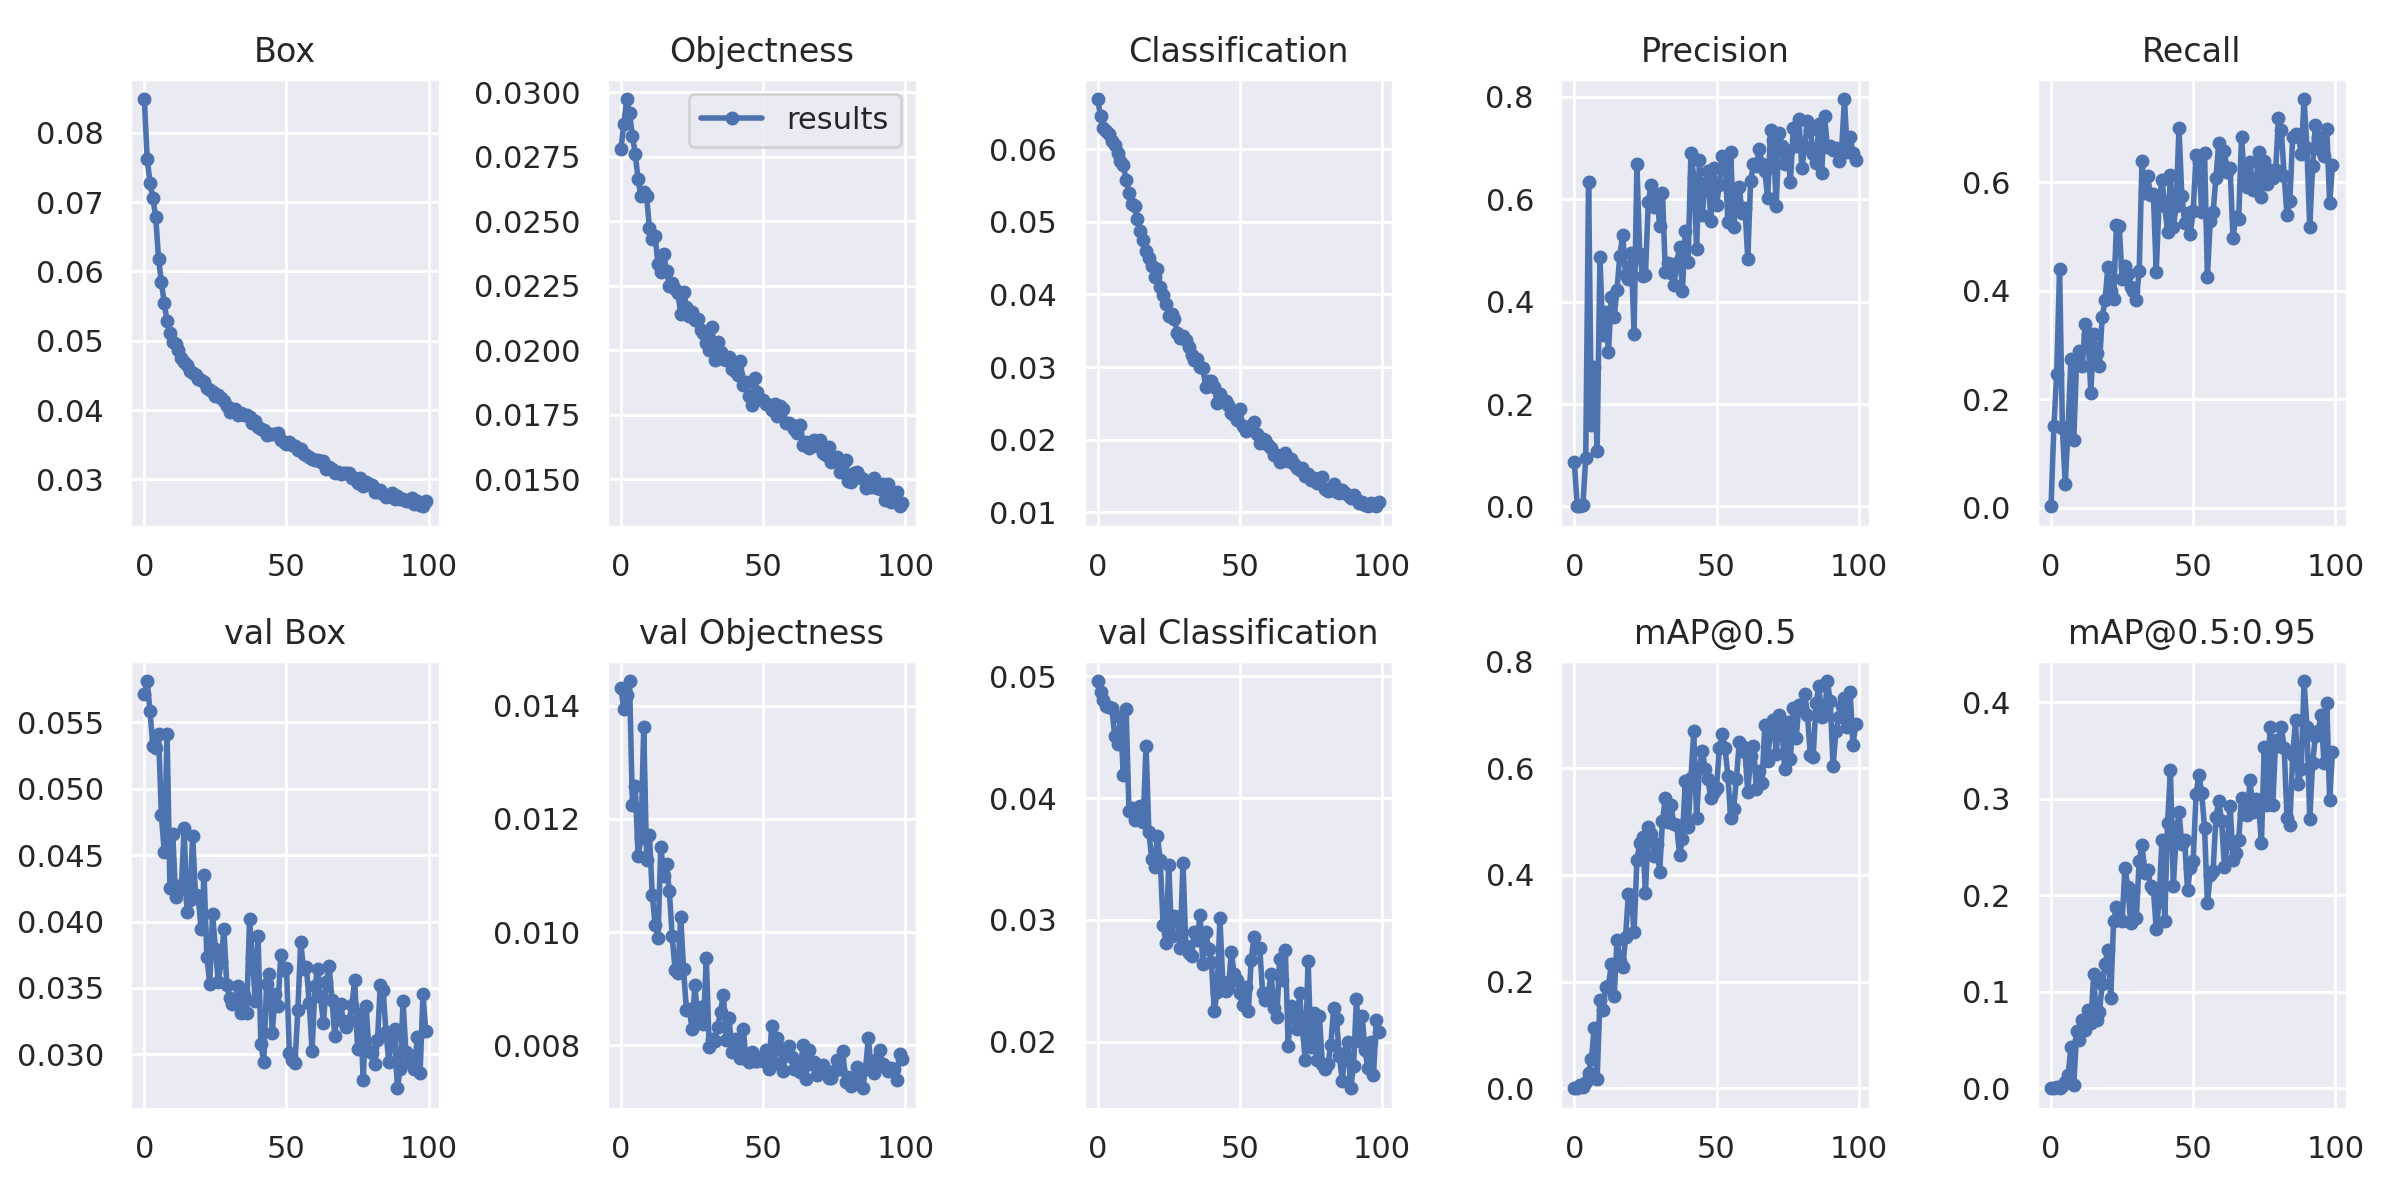

In [26]:
#Plotting the result
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5x_results/results.png', width=1000)  # view results.png

GROUND TRUTH TRAINING DATA:


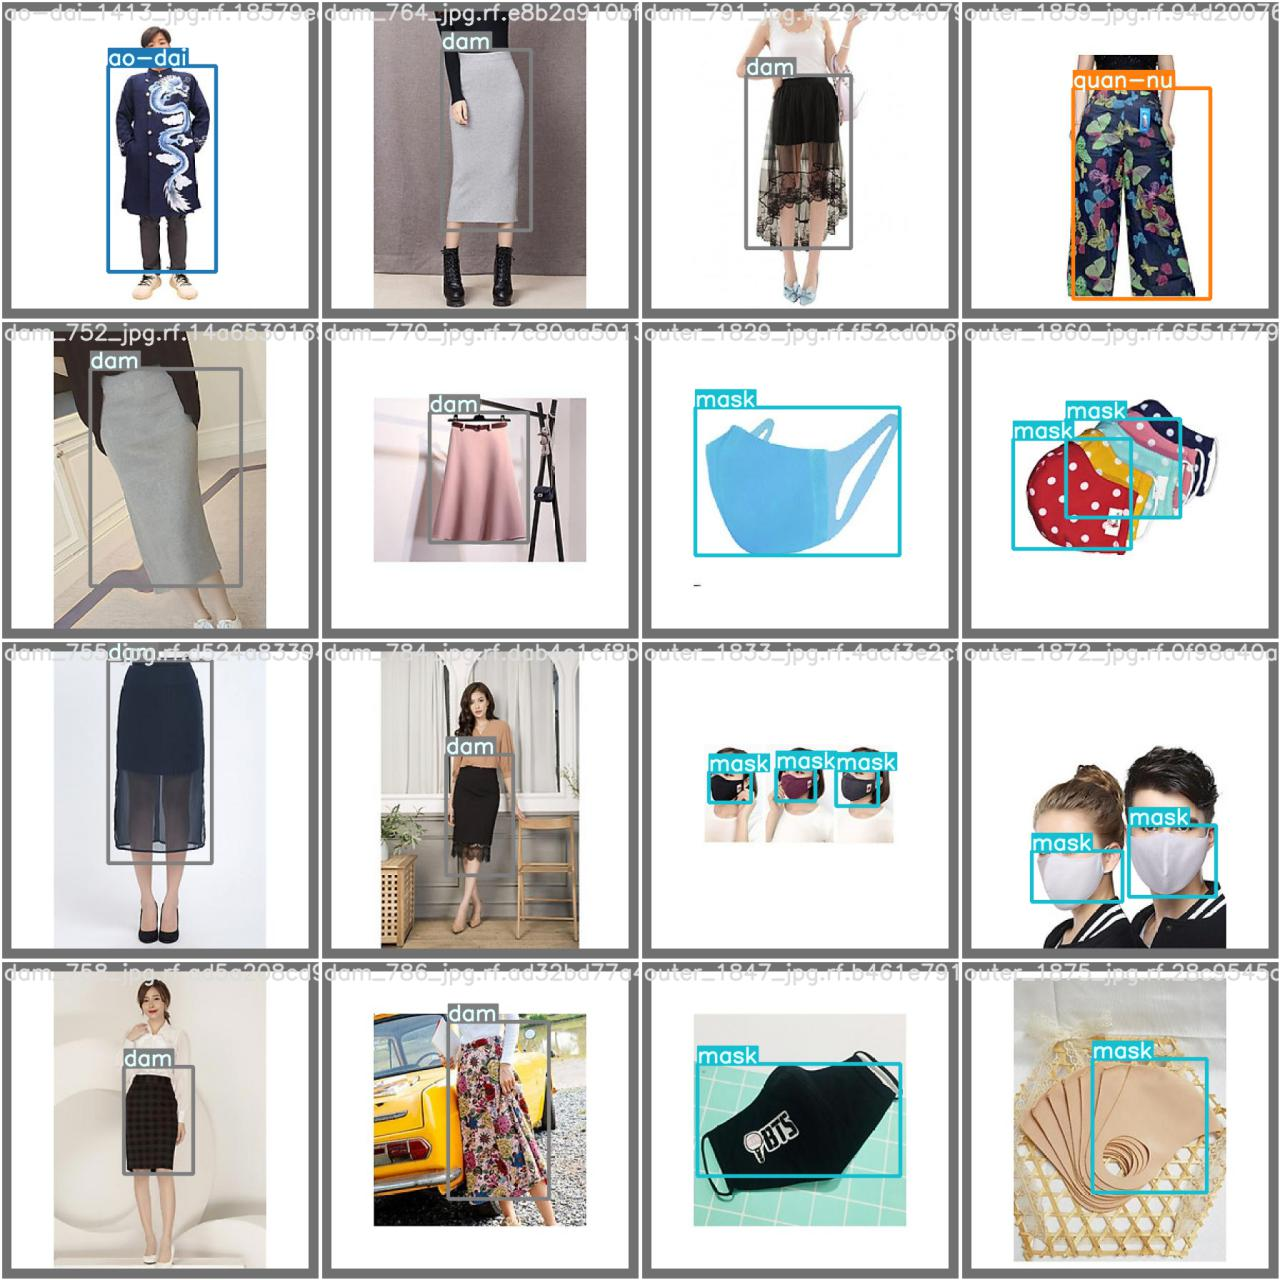

In [27]:
#Visualizing some test cases:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5x_results/test_batch0_labels.jpg', width=900)

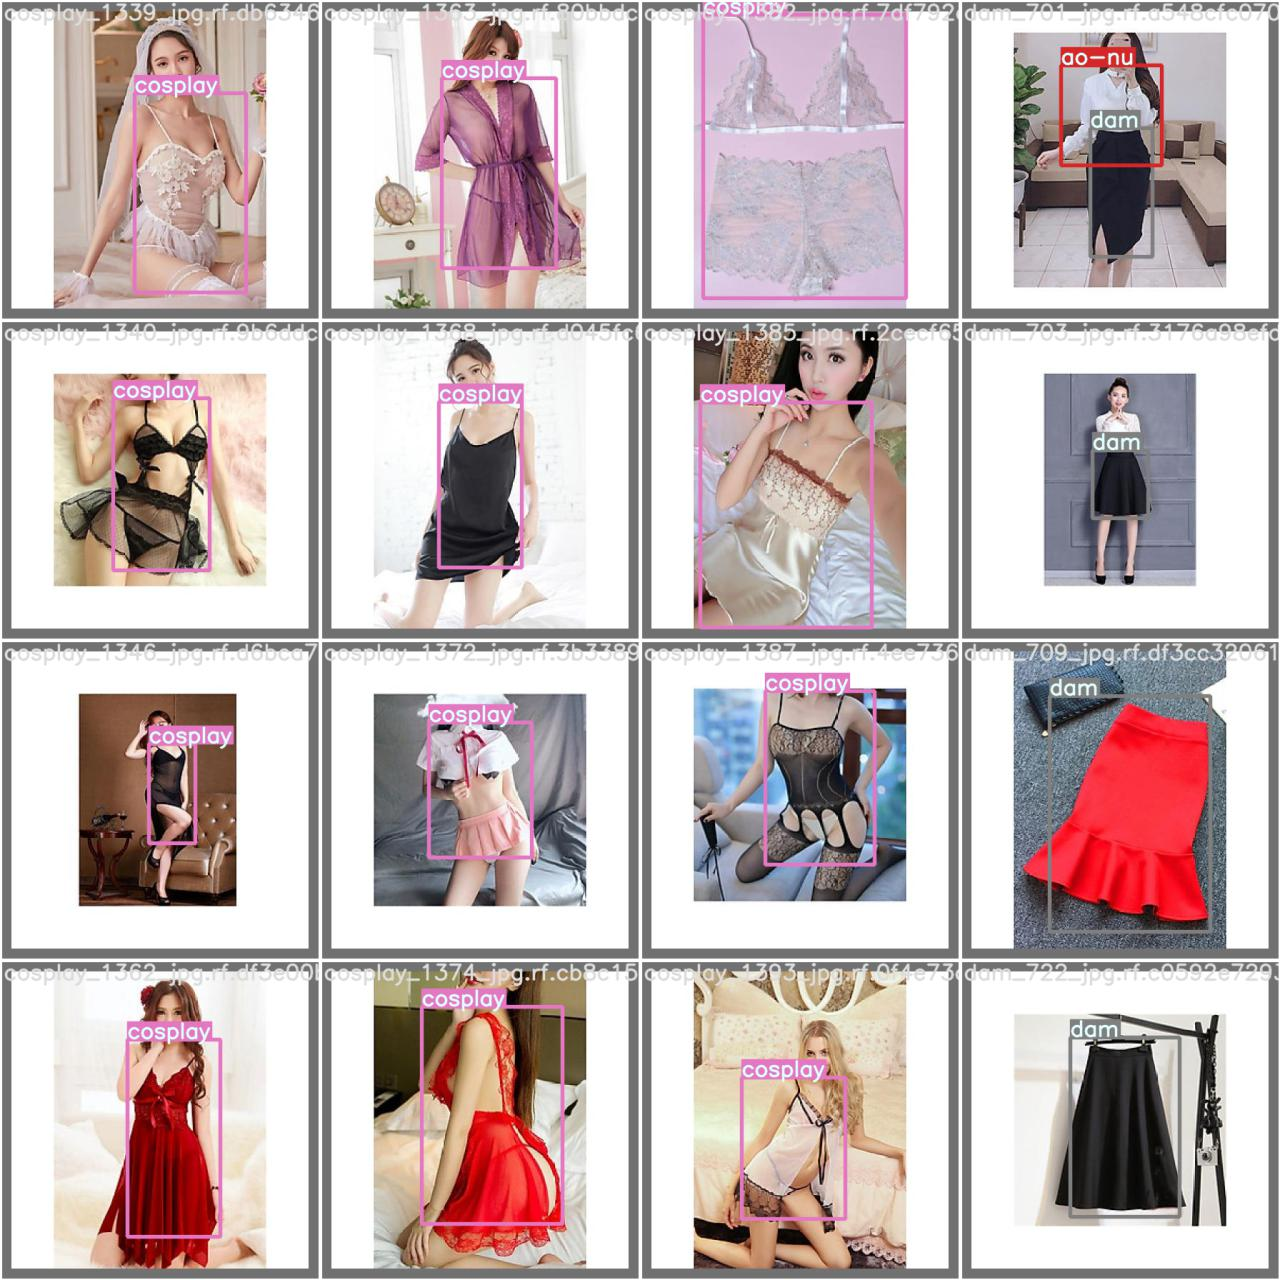

In [30]:
#Visualizing some test cases:
Image(filename='/content/yolov5/runs/train/yolov5x_results/test_batch1_labels.jpg', width=900)

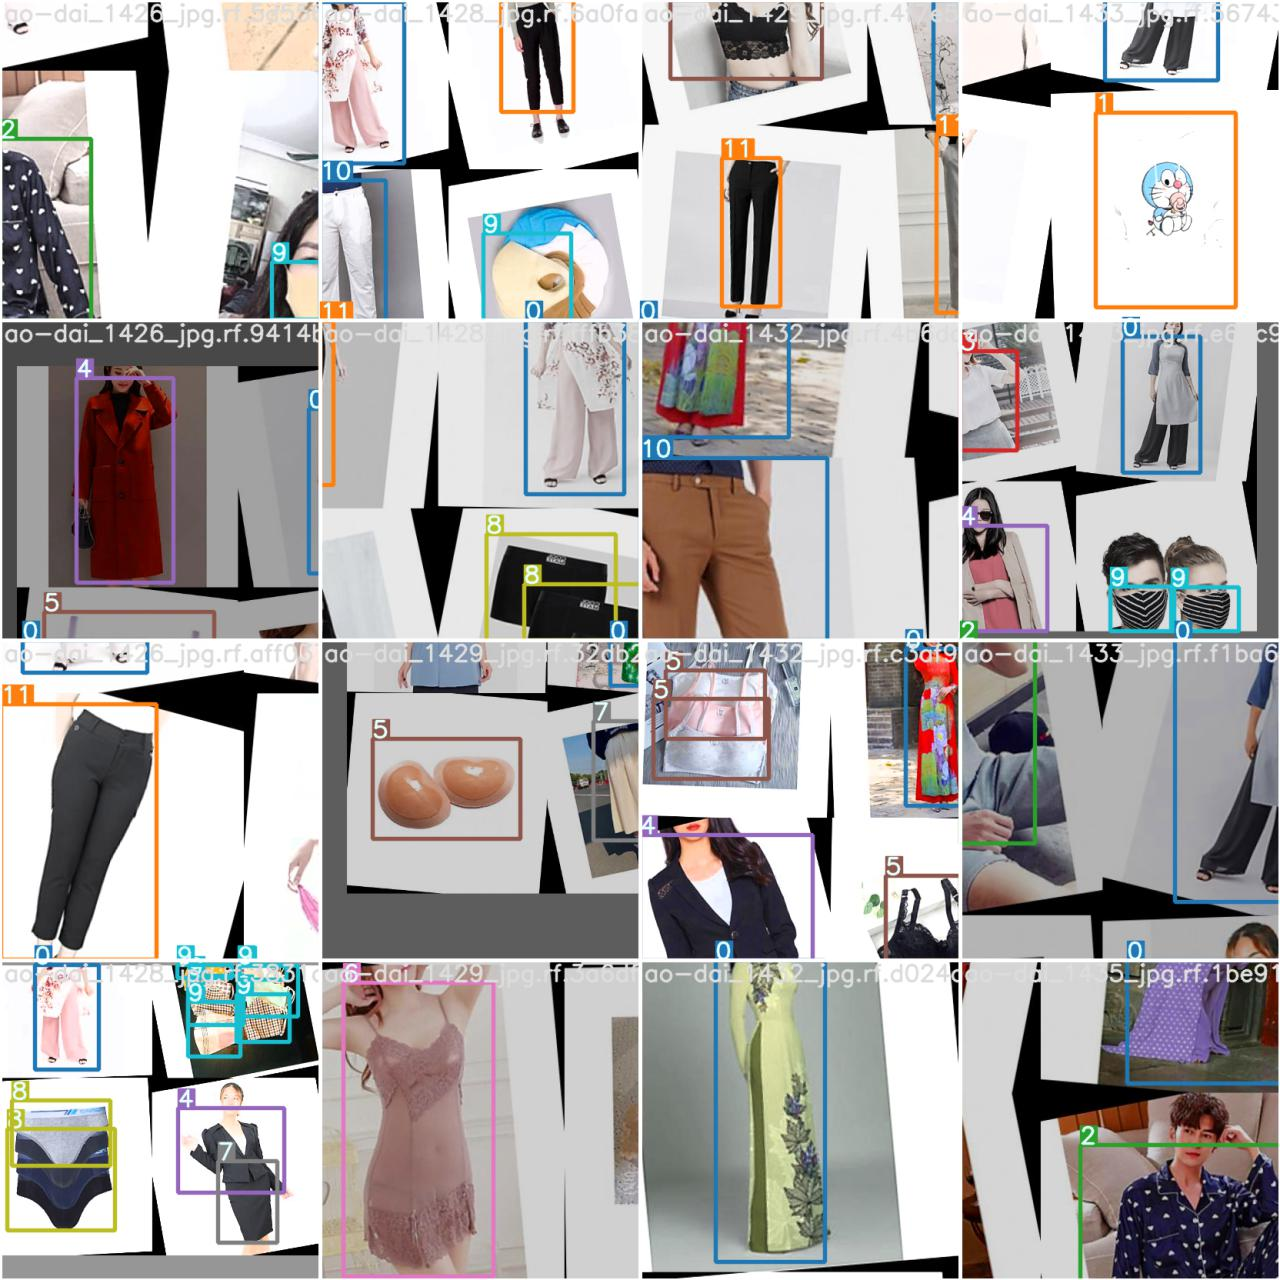

In [31]:
#Visualizing some test cases:
Image(filename='/content/yolov5/runs/train/yolov5x_results/train_batch1.jpg', width=900)

In [32]:
## Mount to drive
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [36]:
#make predict:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5x_results/weights/best.pt --img 416 --conf 0.4 --source ../test/images

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=416, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/images', update=False, view_img=False, weights=['runs/train/yolov5x_results/weights/best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 476 layers, 87272713 parameters, 0 gradients, 217.3 GFLOPS
image 1/101 /content/yolov5/../test/images/ao-dai_1406_jpg.rf.02a7ca8ca85003606e7d070fbf5c4c6e.jpg: 416

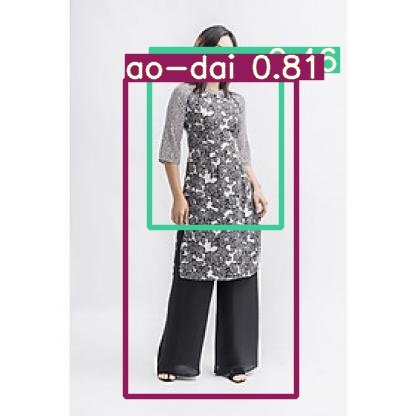

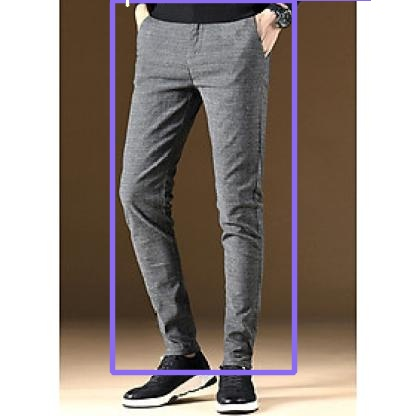

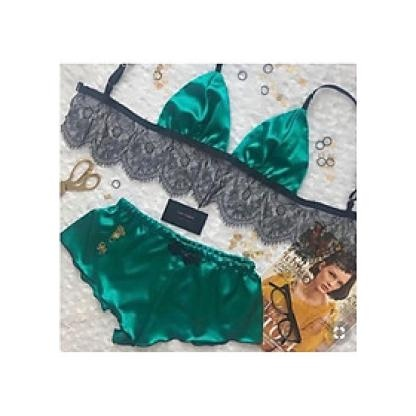

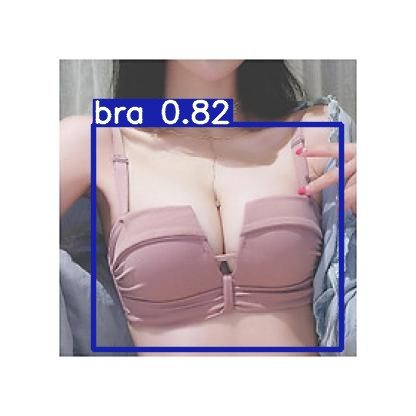

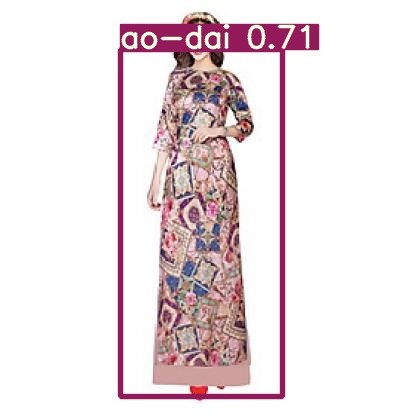

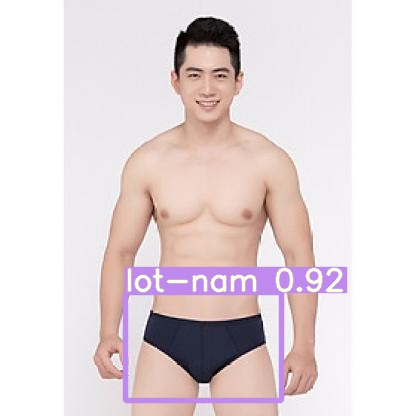

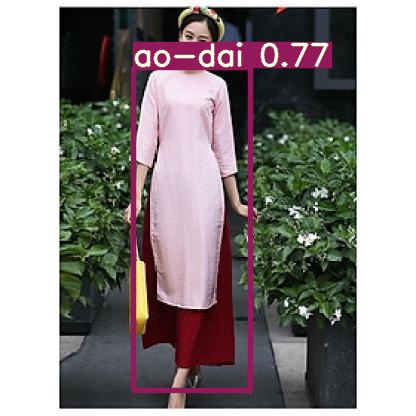

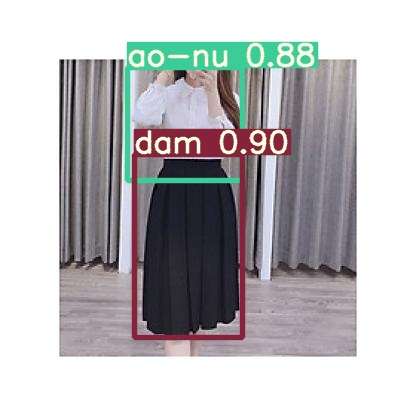

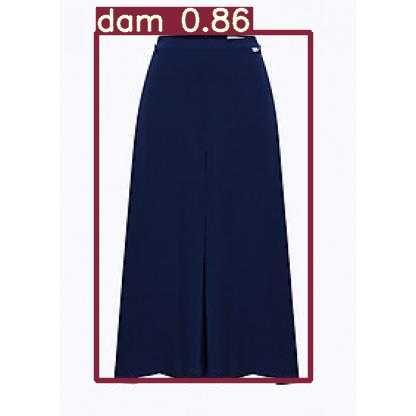

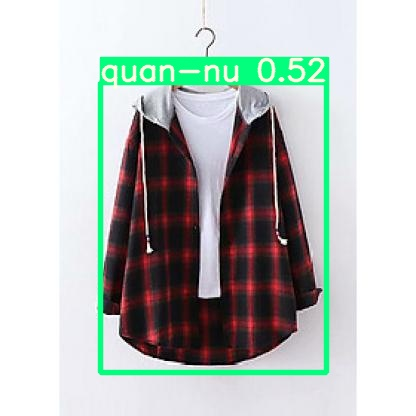

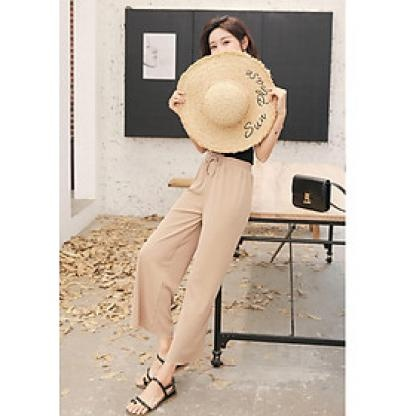

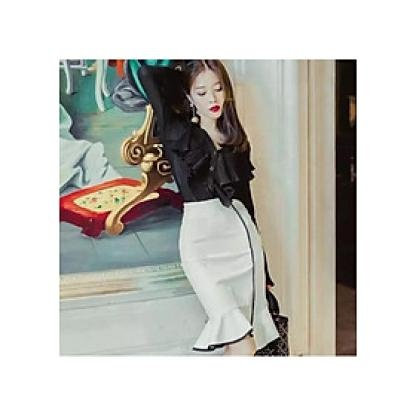

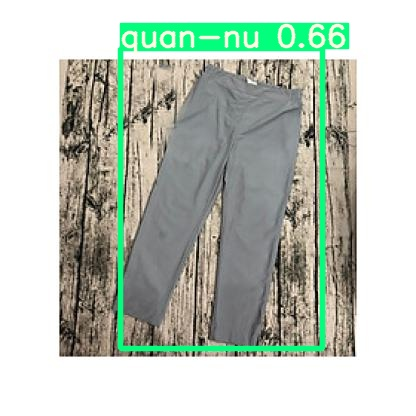

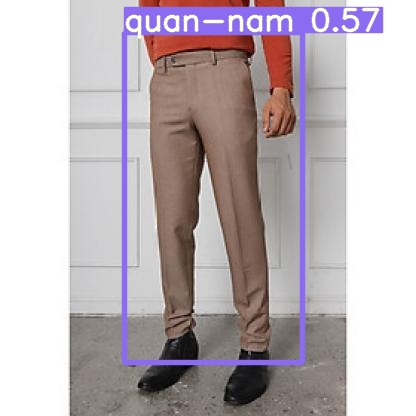

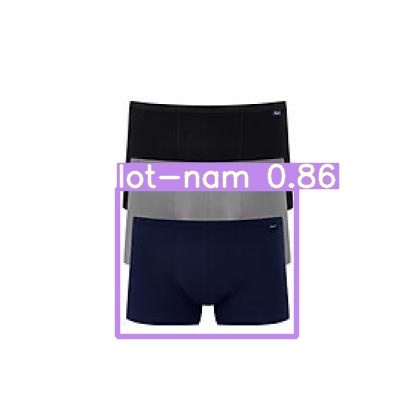

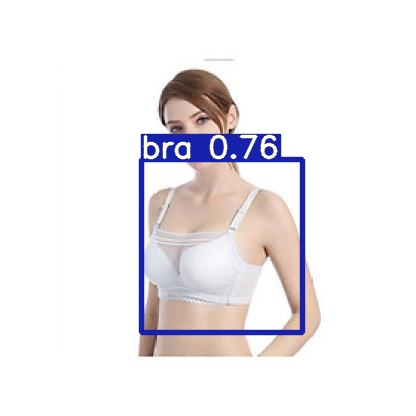

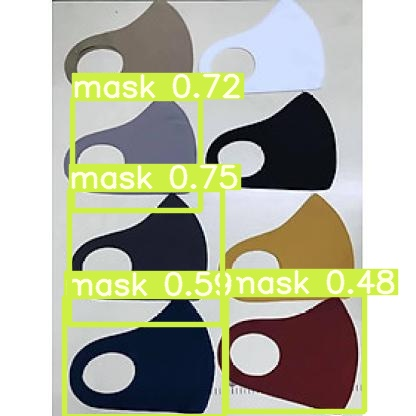

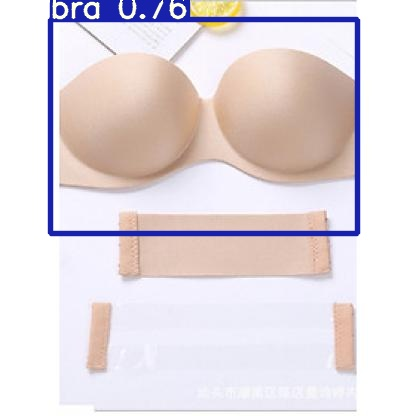

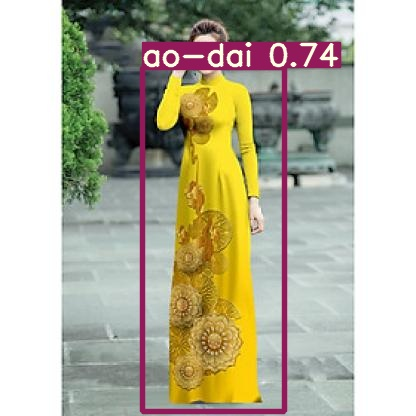

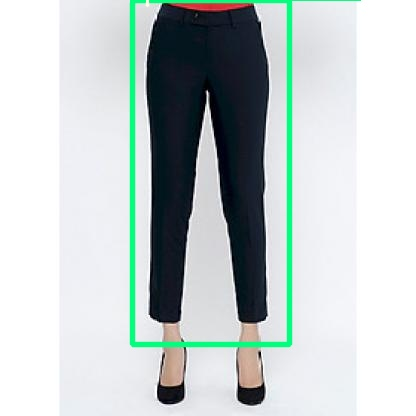

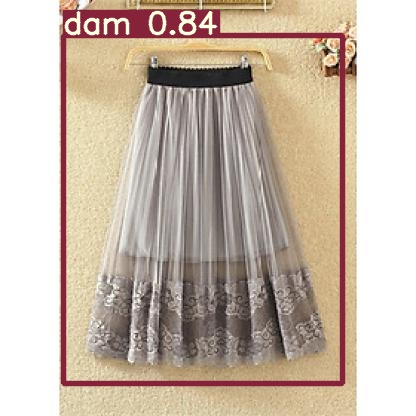

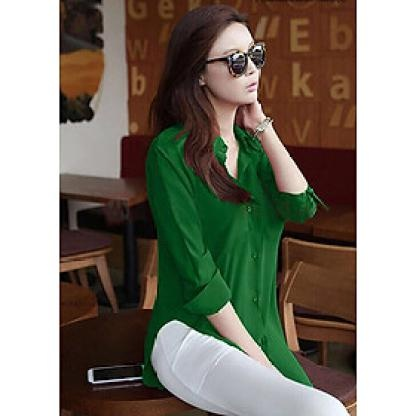

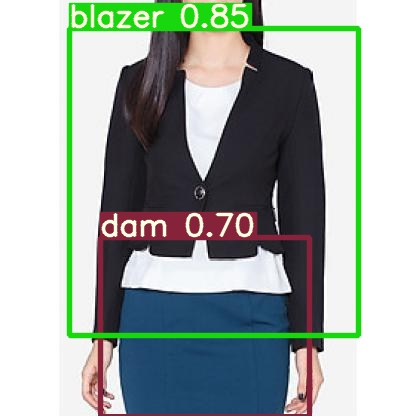

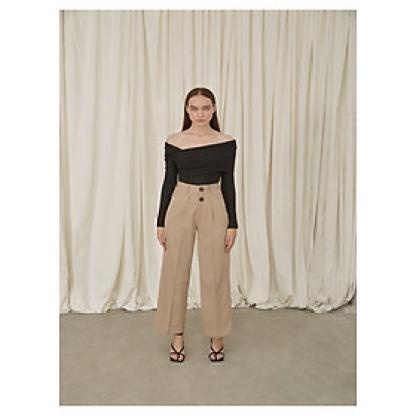

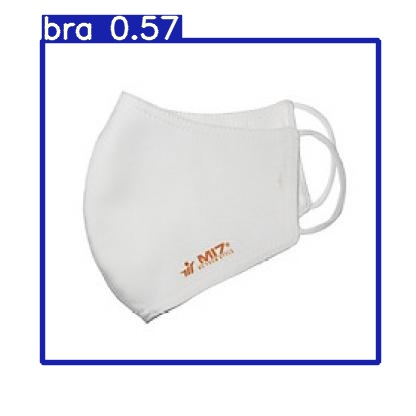

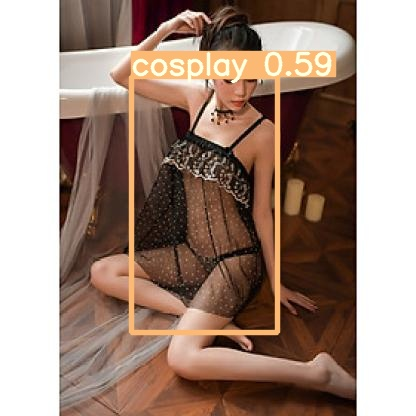

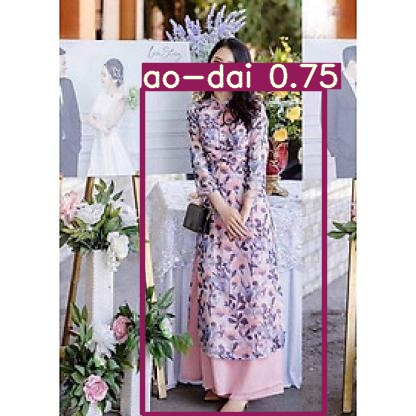

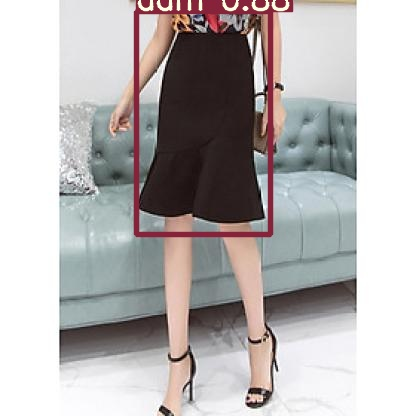

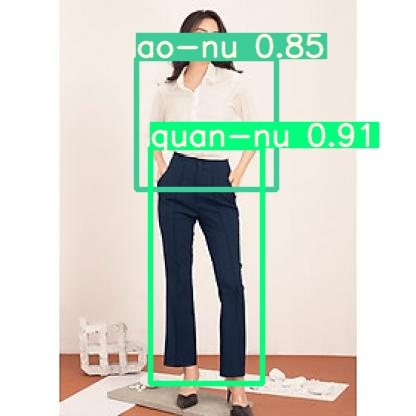

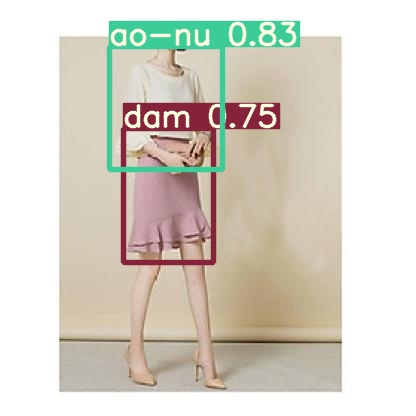

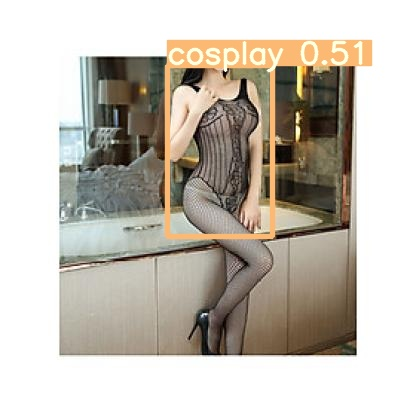

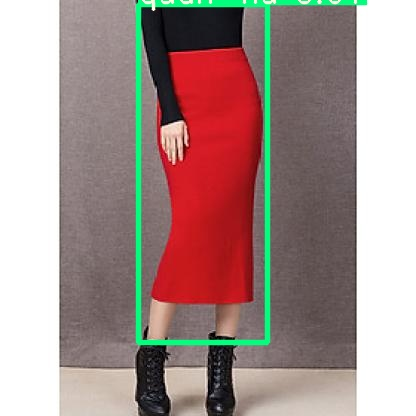

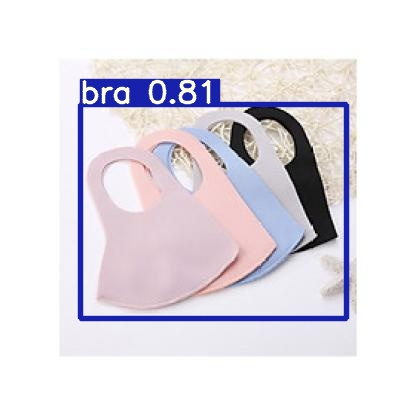

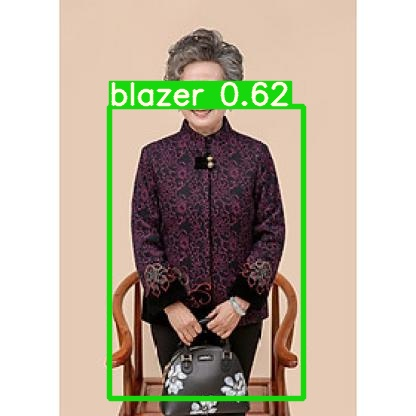

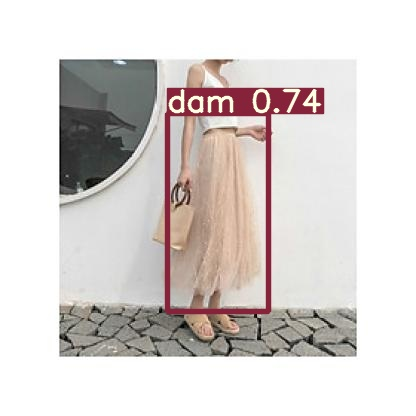

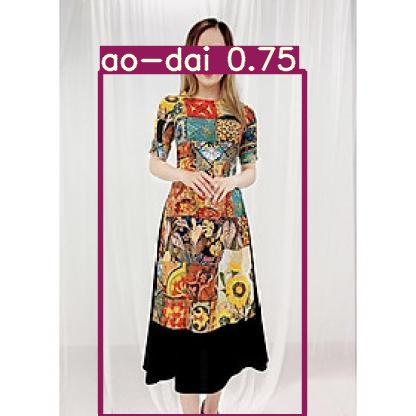

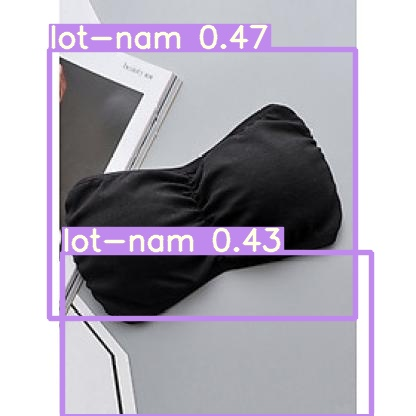

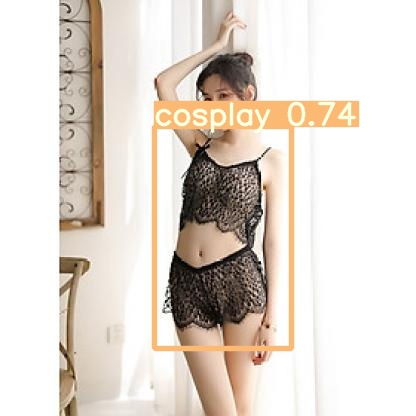

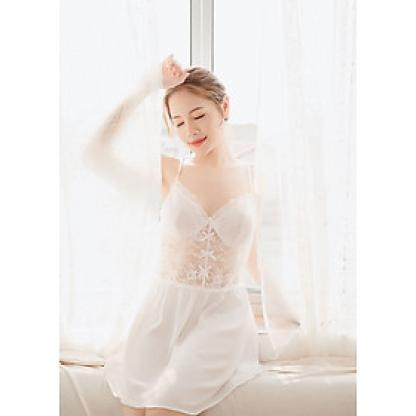

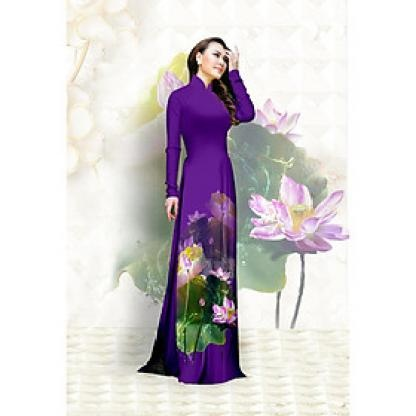

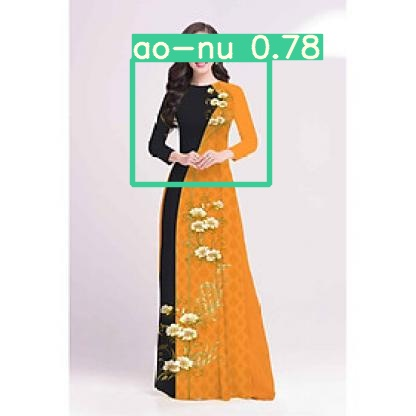

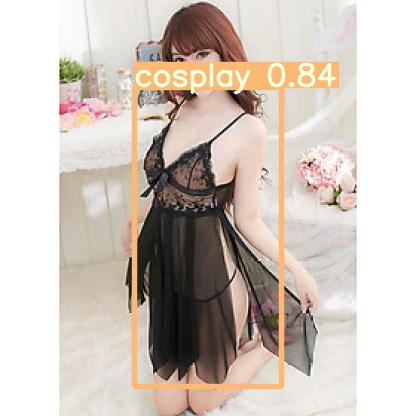

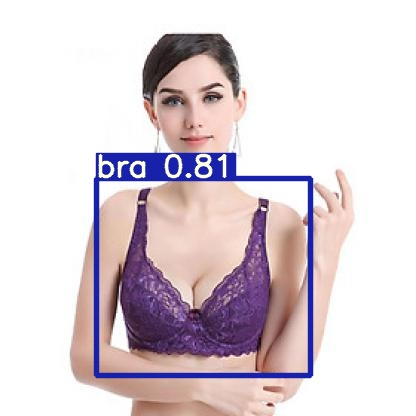

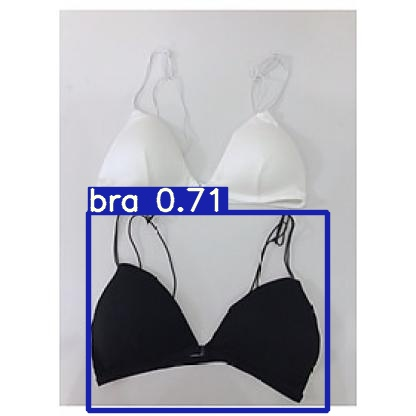

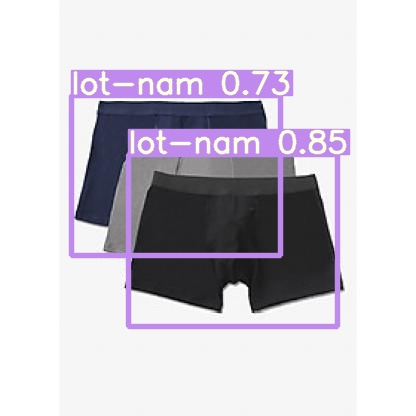

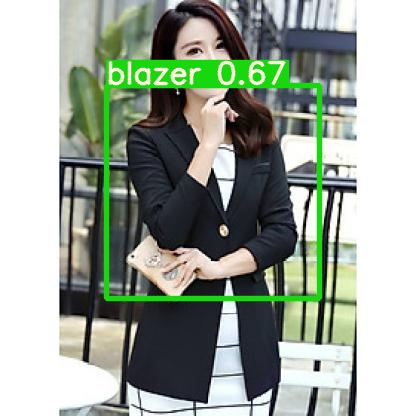

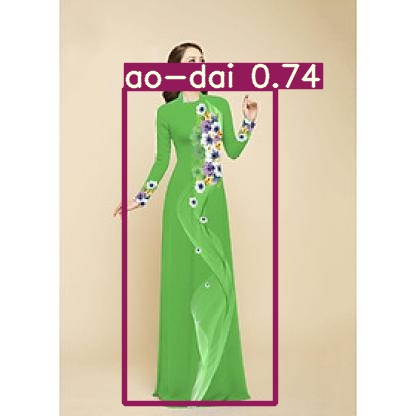

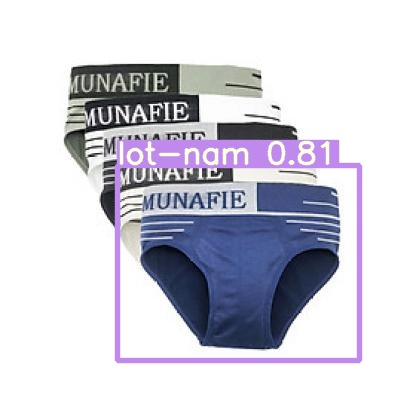

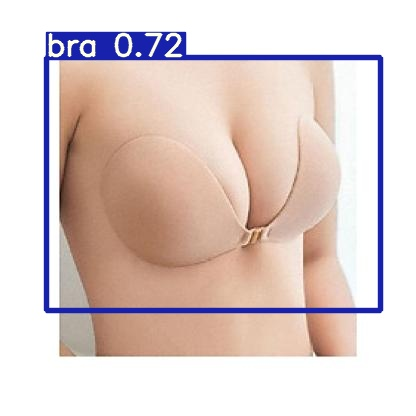

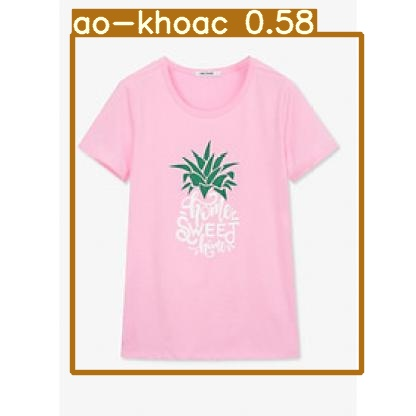

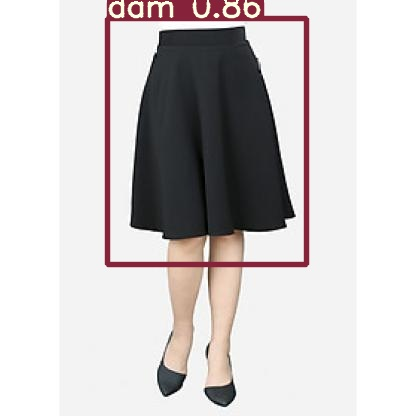

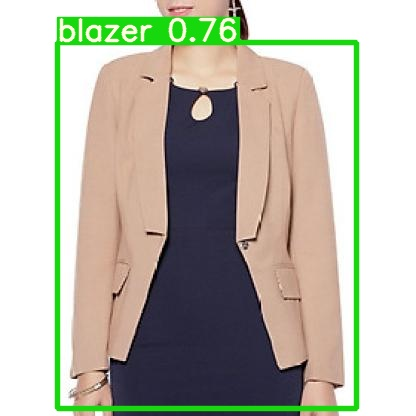

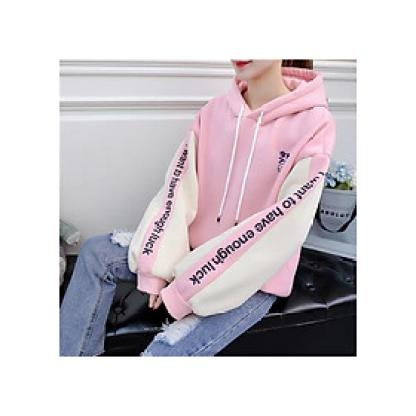

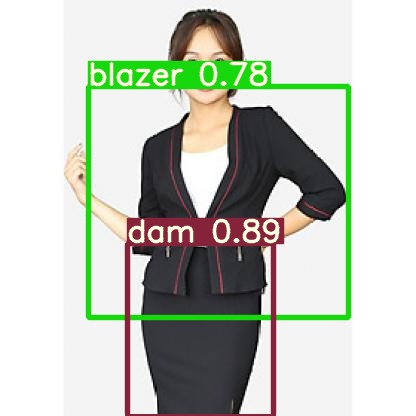

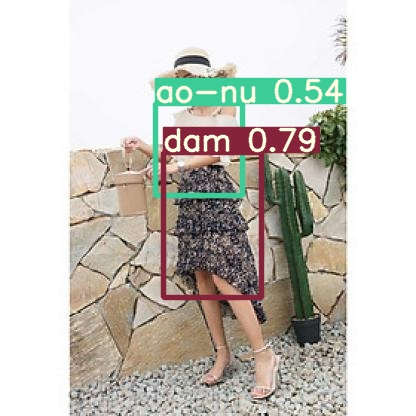

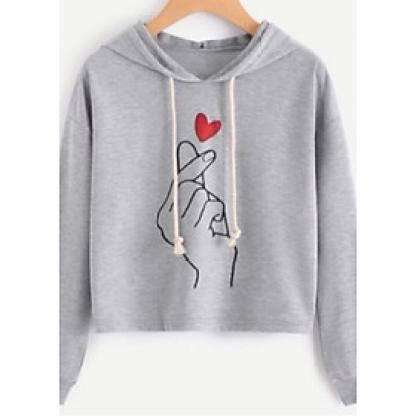

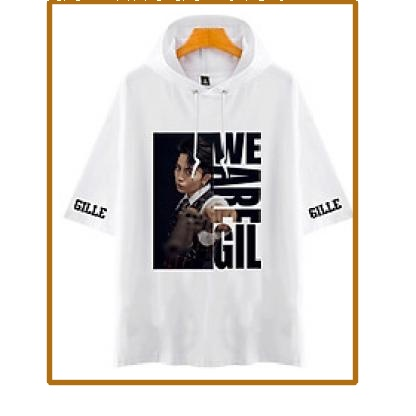

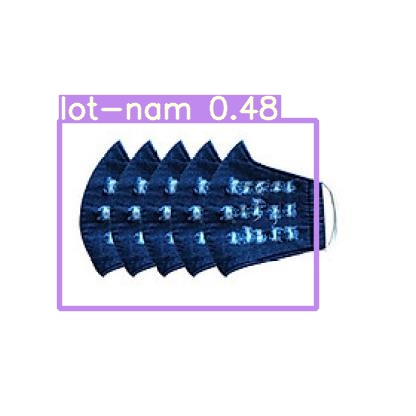

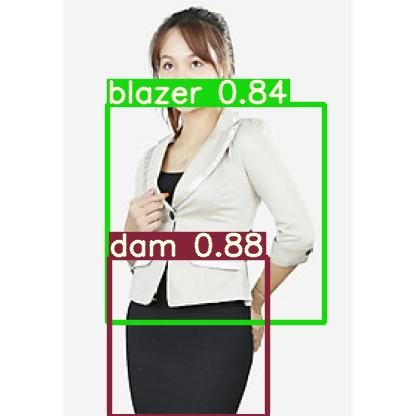

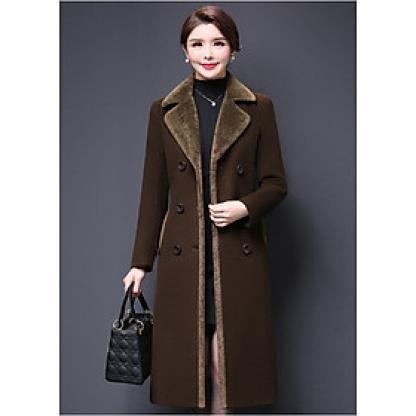

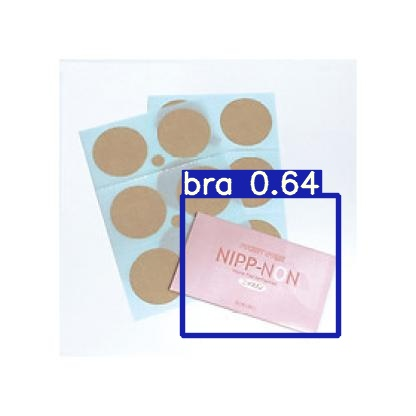

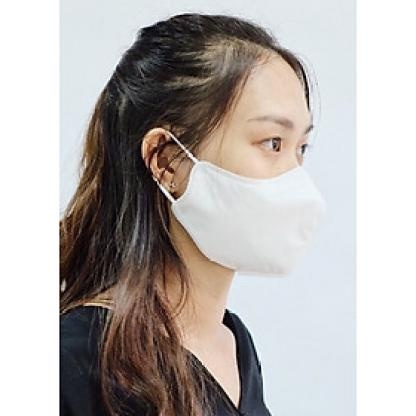

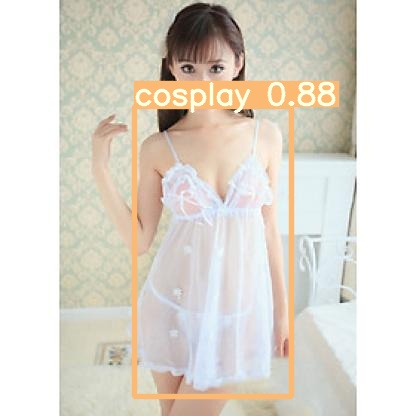

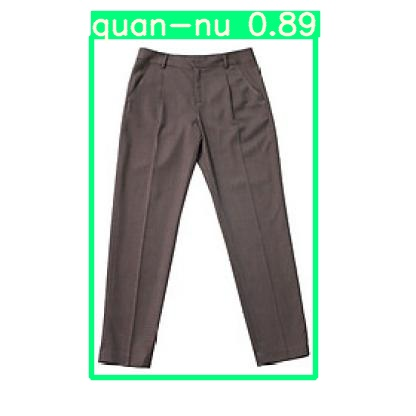

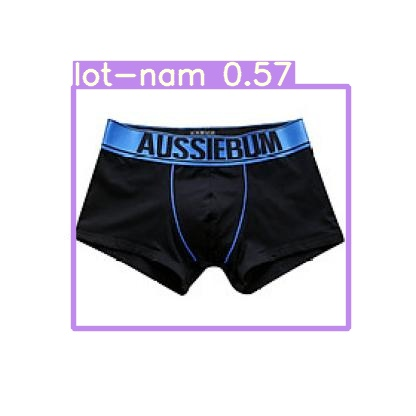

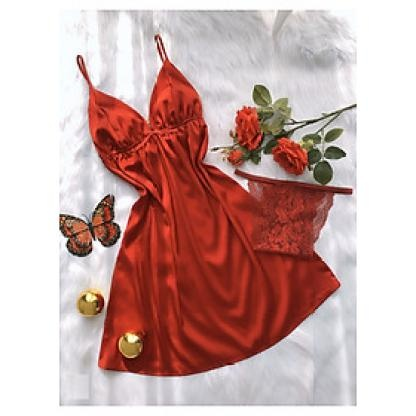

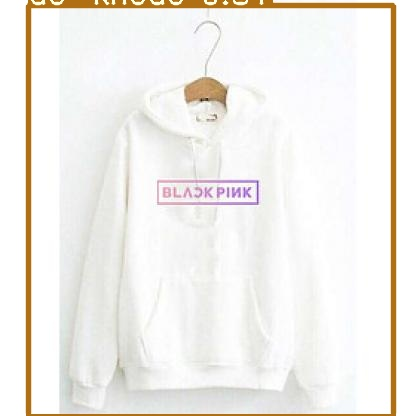

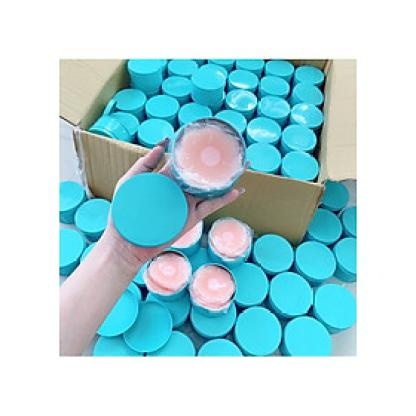

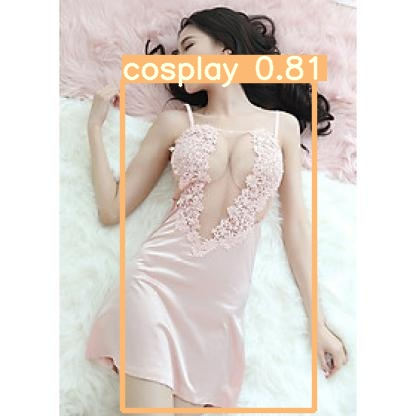

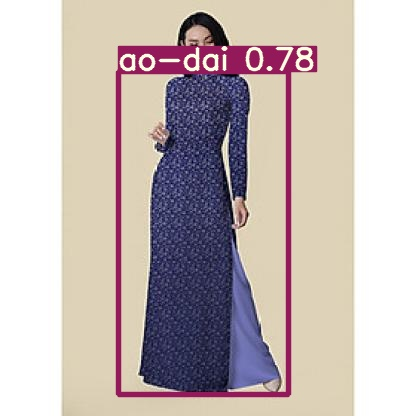

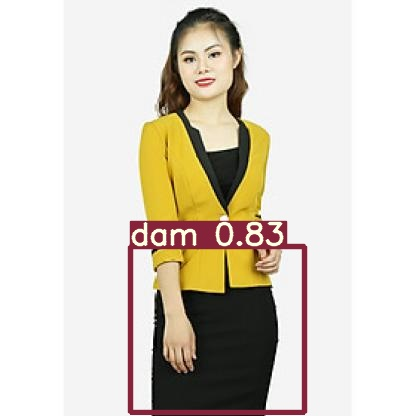

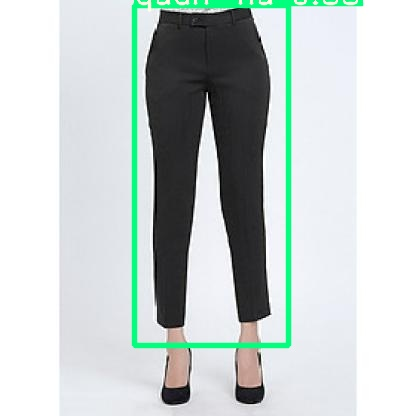

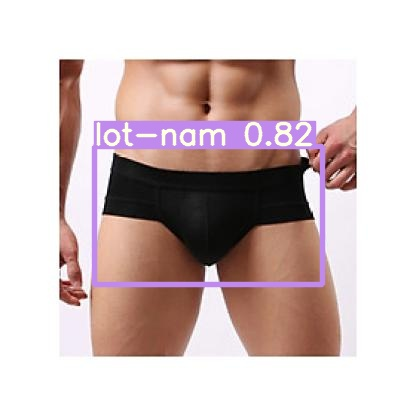

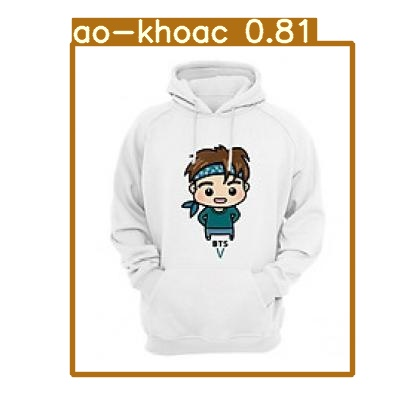

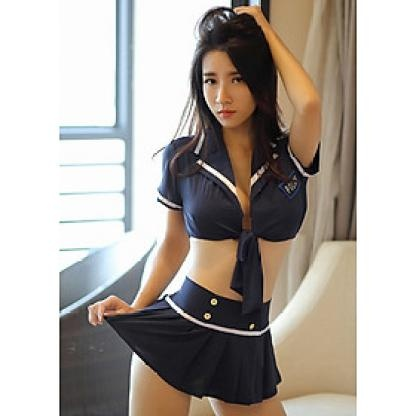

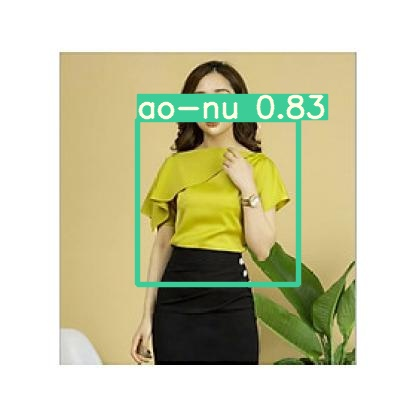

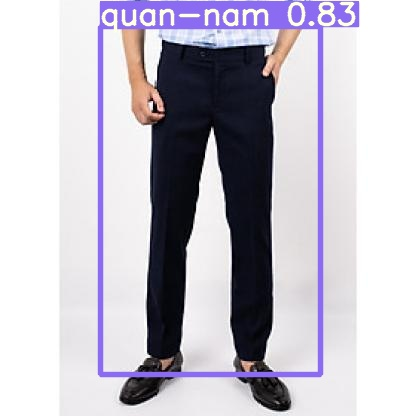

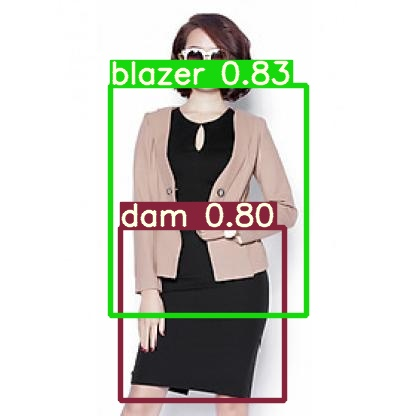

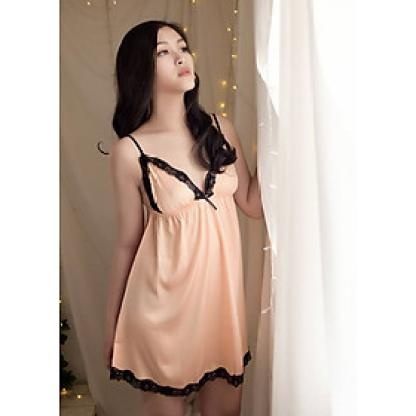

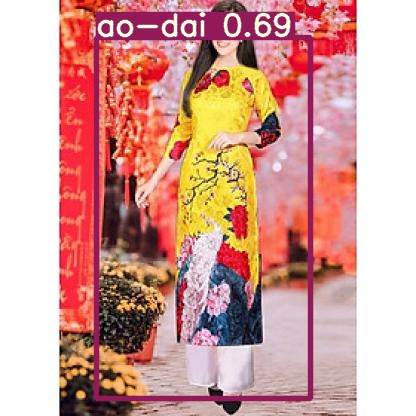

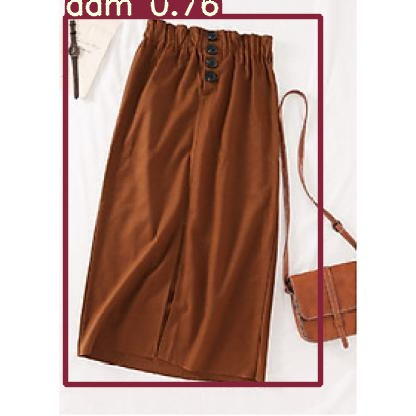

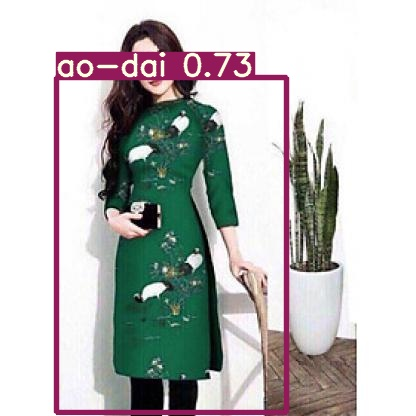

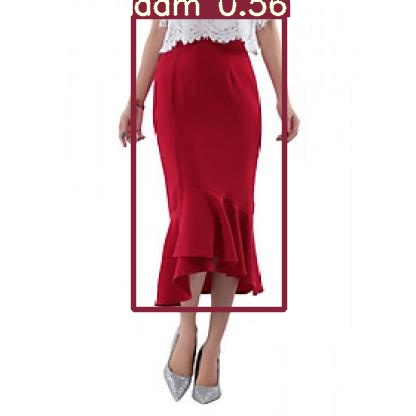

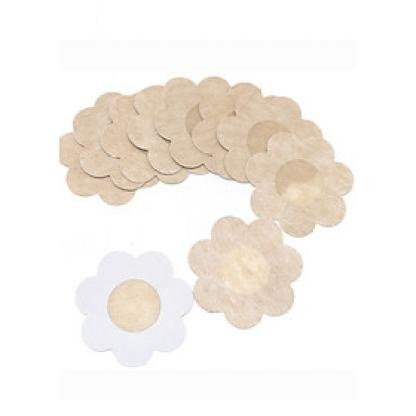

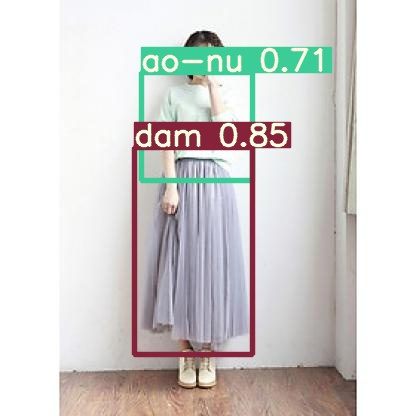

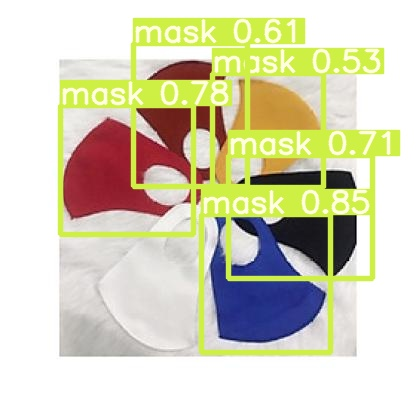

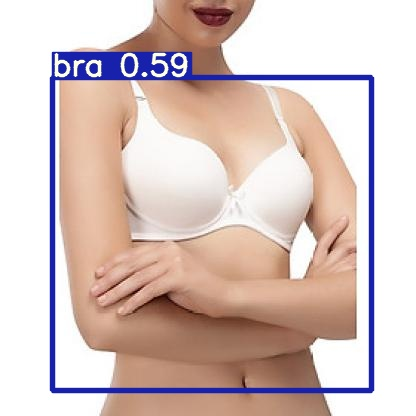

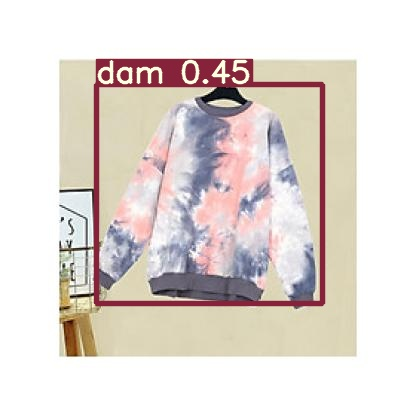

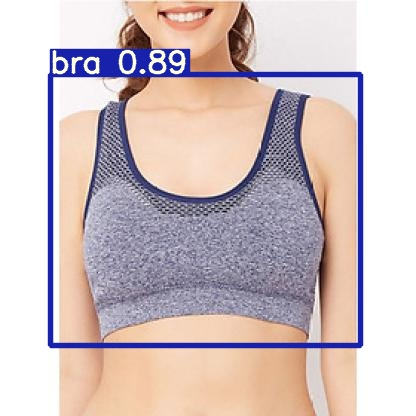

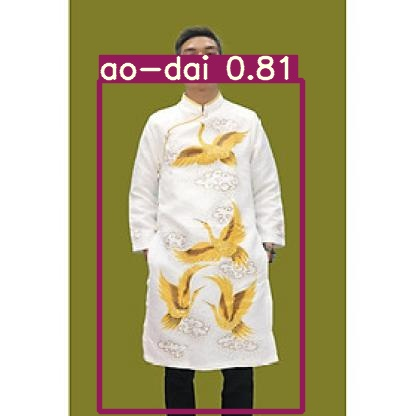

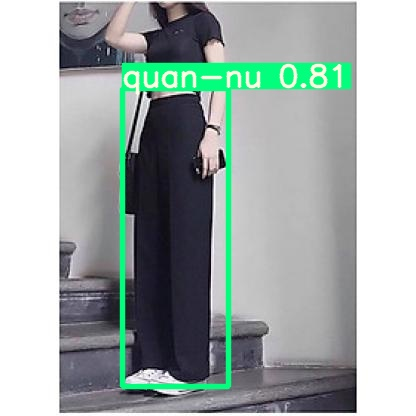

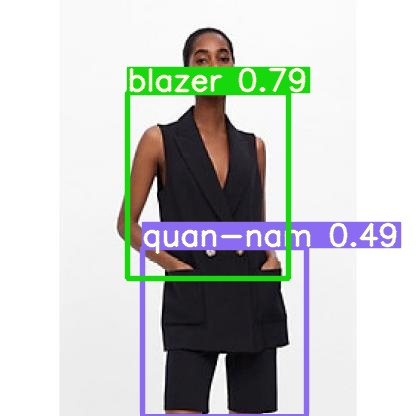

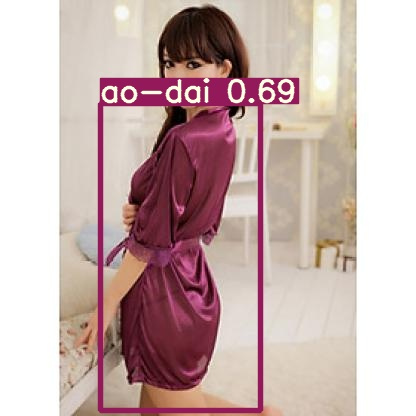

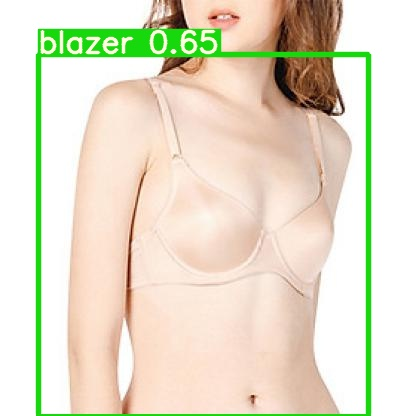

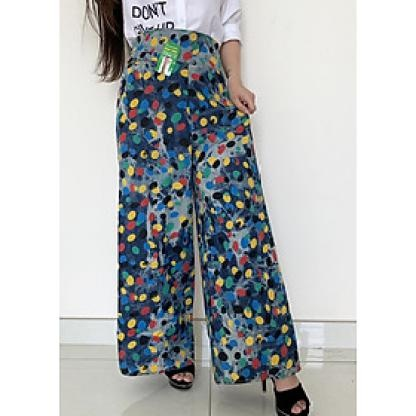

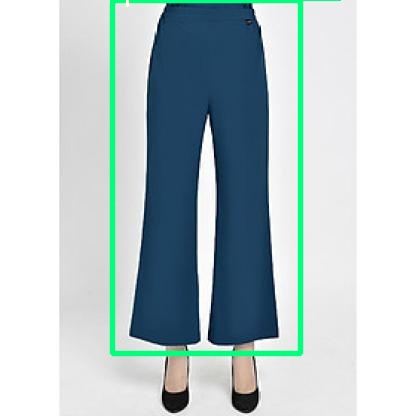

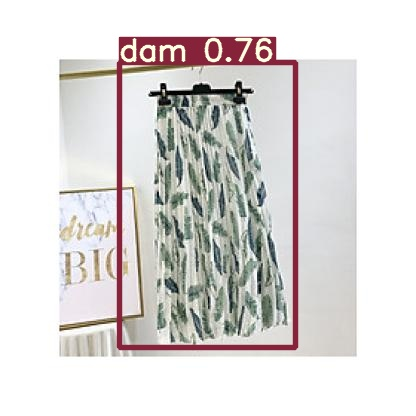

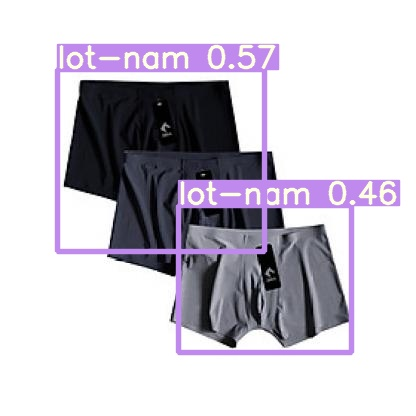

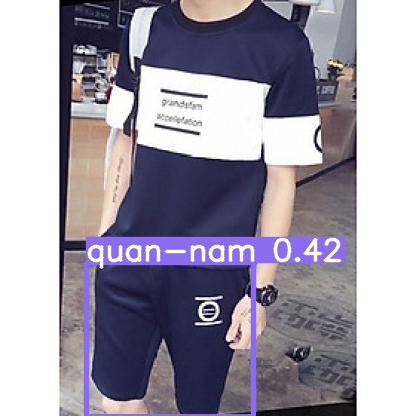

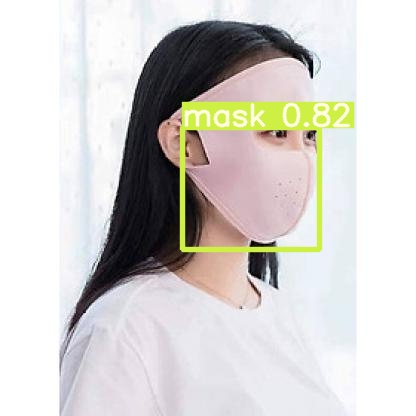

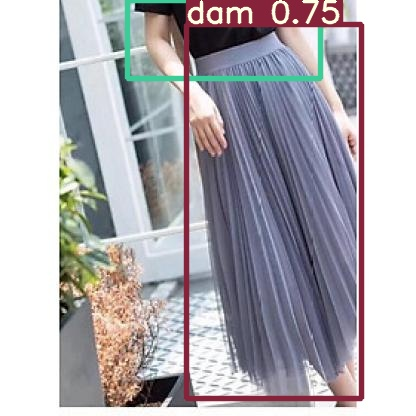

In [42]:
#display inference on ALL test images for analizing intutively:

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

In [44]:
#export best weight to run on unlabeled dataset
%cp /content/yolov5/runs/train/yolov5x_results/weights/best.pt /content/mydrive/MyDrive/SSS/

In [48]:
ls '/content/mydrive/MyDrive/SSS/'

assets/  IMG_split/     keras_metadata.pb  variables/
best.pt  IMG_split.zip  saved_model.pb
